Lab 4, Jonah Librande

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

# Setup

Pull our data in, check it has the proper form, and generally ready it for problem 1.

In [60]:
hf = h5py.File('gammaray_lab4.h5', 'r')
data = np.array(hf.get('data'))
print(data.shape)

(4, 25920001)


In [61]:
for i in range(4):
    print(data[i,])
hf.close()

[9.40680016e+08 9.40680016e+08 9.40680016e+08 ... 9.43272016e+08
 9.43272016e+08 9.43272016e+08]
[315.         315.00711228 315.01422457 ... 345.31910877 345.32622105
 345.33333333]
[45.         45.00666667 45.01333334 ... 44.98666666 44.99333333
 45.        ]
[10.  8.  7. ...  8. 11. 12.]


It appears that everything has the correct units, and we have the array dimensions. We should be good to go.

# 1A and 1B

We are ultimately interested in the counts gamma rays, so we care about only the dependence between the counts and each other variable, not the dependence of any of the other three on one another. We could examine, say, how phase depends on time, or how the two phases are related, but this would be worthless without some additional motivation to do so - on its own, these relationships would tell us nothing about our desired observable, the counts. We then check two things: first, what the observable in question looks like as a distribution independent of the other quantities, and then we want the dependence of the counts on the other three variables. 

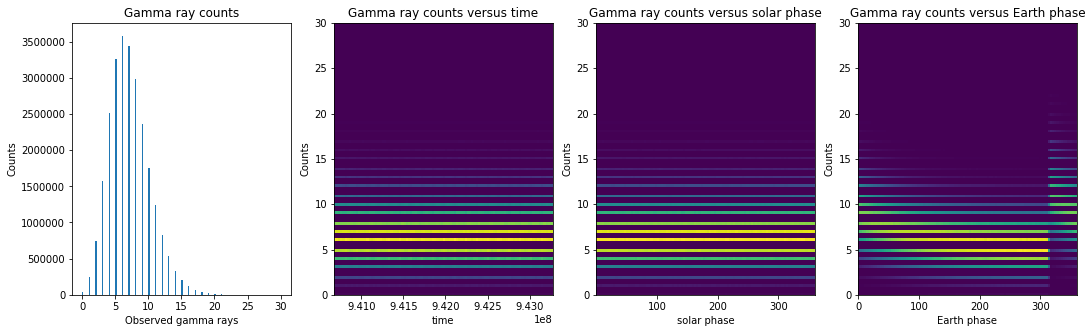

In [62]:
fig, a = plt.subplots(1, 4, figsize=(18, 5))

a[0].hist(data[3,], bins=150)
a[0].set_title('Gamma ray counts')
a[0].set_xlabel('Observed gamma rays')
a[0].set_ylabel('Counts')

labelz = ['time', 'solar phase', 'Earth phase']

for i in range(3):
    a[i + 1].hist2d(data[i,], data[3,], bins=[100,100])
    a[i + 1].set_xlabel(labelz[i])
    a[i + 1].set_ylabel('Counts')
    a[i + 1].set_title('Gamma ray counts versus ' + labelz[i])

plt.show()

We see a nice Poisson distribution in the distribution of the counts, with an average number of counts around 7. We also see flat lines when we graph time against counts, and solar phase against counts, which indicates independence. However, we see that the graph of Earth phase against counts yields something which is not flat, and there is therefore some dependence on this phase. We look closer at this relationship:

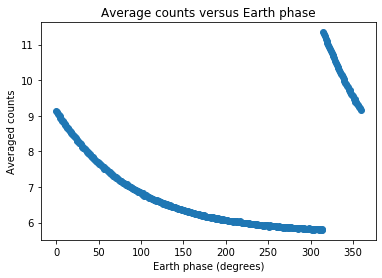

In [63]:
plt.cla()

M = np.max(data[2,])
m = np.min(data[2,])

bins = 360
wid = (M - m) / bins
avgs = []

for n in range(bins):
    splrt = np.where((data[2,] > (wid * n)) & (data[2,] <= (wid * (n +1))))
    s = np.sum(data[3, splrt])
    av = s / len(data[3, splrt][0])
    avgs.append(av)
    
plt.plot(range(bins), avgs, 'o')
plt.title('Average counts versus Earth phase')
plt.xlabel('Earth phase (degrees)')
plt.ylabel('Averaged counts')
plt.show()

We see that the average counts drifts with Earth phase, with an abrupt discontinuity at what looks to be roughly 315 degrees or so. Starting at this break phase, our average number of counts starts much higher than the average we would have expected from the previous graph, falls off very rapidly, and then gently tapers into a tail, which then hits the break phase and jumps back up. 

# 1C

We want a model that includes the "time dependence" of the model, but this is realy phase dependence. Accordingly, we will construct a model for the data that takes the Earth phase as a parameter. Of course, time is easily convertible into phase - for a given time, we can just take the index of the time measurement and grab the phase corresponding to this index, which can then be fed to the model. I will explicitly assume that the phase contains all the dependence of the experiement, so that at any given phase, we are then just counting the number of gamma rays we see, and we return to a Poisson distribution. Using this assumption, I use the average counts per phase array constructed above to find the average of the Poisson distribution for any given integer phase, which then completely determines the distribution. We pick several random values of phase and graph the data against the presumed Poisson distribution to see the quality of the fit.

Check 1: phase between 137 and 138 degrees


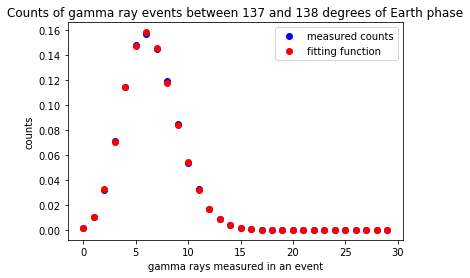

In [64]:
plt.cla()

phases = data[2,]
allEvents = data[3,]
M = max(allEvents)
cnts = np.zeros(int(M))

print('Check 1: phase between 137 and 138 degrees')
ph = 137

idx = np.where((phases > ph) & (phases <= ph + 1))
ev1 = allEvents[idx]
for n in ev1:
    cnts[int(n)] += 1
    
s = sum(cnts)
plt.plot(range(30), cnts / s, 'bo', label='measured counts')
plt.plot(range(30), stats.poisson.pmf(range(30), avgs[ph]), 'ro', label='fitting function')
plt.title('Counts of gamma ray events between 137 and 138 degrees of Earth phase')
plt.xlabel('gamma rays measured in an event')
plt.ylabel('counts')
plt.legend()

plt.show()

Check 2: phase between 250 and 251 degrees


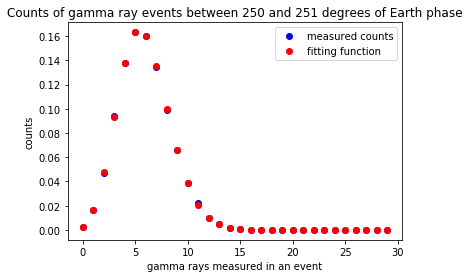

In [65]:
plt.cla()

print('Check 2: phase between 250 and 251 degrees')
ph2 = 250
cnts2 = np.zeros(int(M))

idx2 = np.where((phases > ph2) & (phases <= ph2 + 1))
ev2 = allEvents[idx2]
for n in ev2:
    cnts2[int(n)] += 1
    
s2 = sum(cnts2)
plt.plot(range(30), cnts2 / s2, 'bo', label='measured counts')
plt.plot(range(30), stats.poisson.pmf(range(30), avgs[ph2]), 'ro', label='fitting function')
plt.title('Counts of gamma ray events between {} and {} degrees of Earth phase'.format(str(ph2), str(ph2 + 1)))
plt.xlabel('gamma rays measured in an event')
plt.ylabel('counts')
plt.legend()

plt.show()

Check 3: phase between 346 and 347 degrees


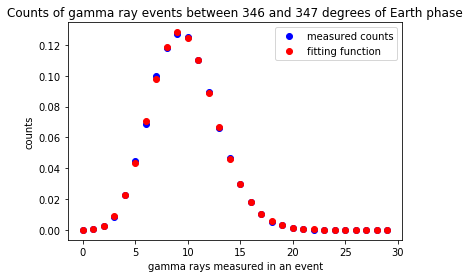

In [66]:
plt.cla()

print('Check 3: phase between 346 and 347 degrees')
ph3 = 346
cnts3 = np.zeros(int(M))

idx3 = np.where((phases > ph3) & (phases <= ph3 + 1))
ev3 = allEvents[idx3]
for n in ev3:
    cnts3[int(n)] += 1
    
s3 = sum(cnts3)
plt.plot(range(30), cnts3 / s3, 'bo', label='measured counts')
plt.plot(range(30), stats.poisson.pmf(range(30), avgs[ph3]), 'ro', label='fitting function')
plt.title('Counts of gamma ray events between {} and {} degrees of Earth phase'.format(str(ph3), str(ph3 + 1)))
plt.xlabel('gamma rays measured in an event')
plt.ylabel('counts')
plt.legend()

plt.show()

Agreement is excellent in all 3 cases. It is mildly worse in the last graph, but the margin of error is acceptably small, and this is predictable deviation from the model - looking back to 1B, we see that the drift of the mean is more pronounced in the region from about 315 degrees of phase to 360. Our model for the background implicitly groups all data from an integer phase value to the next nearest integer phase value up, so here, where the mean drifts over a larger range in this interval, the coarse-graining of our model is obvious. However, it is reasonably close everywhere, has the correct mean, and there exists a clear way to refine the model: use as an average for our Poisson background the average of all counts over a smaller phase interval.

# 1D

A 100-millisecond measurement is really just a single measurement, so we are asking what the 5-sigma threshhold is at various times - but as we noted above, time is in a real sense not the true dependent variable here, Earth phase is. Accordingly, we need only look at the threshhold for various values of Earth phase. We define the probability of an event here to be the likelihood that the background produces an event that is as or more signal like than our given event, so that a 5-sigma event is an event that has a probability corresponding to an event 5-sigma from the norm in a normal distribution. We lastly need to note our signals are gamma ray bursts, that is, a larger than normal number of gamma rays, so that more gamma rays are more signal like. The probability of an event is then found by just integrating from it to infinity. Calculate for our three phase values from above.

In [67]:
sig = stats.norm.cdf(5)
print('Phase range 1: 137 to 138')
t1 = stats.poisson.ppf(sig, avgs[137])
print('We find a threshhold of {} gamma rays'.format(t1))
print('\nPhase range 2: 250 to 251')
t2 = stats.poisson.ppf(sig, avgs[250])
print('We find a threshhold of {} gamma rays'.format(t2))
print('\nPhase range 3: 346 to 347')
t3 = stats.poisson.ppf(sig, avgs[346])
print('We find a threshhold of {} gamma rays'.format(t3))

Phase range 1: 137 to 138
We find a threshhold of 23.0 gamma rays

Phase range 2: 250 to 251
We find a threshhold of 22.0 gamma rays

Phase range 3: 346 to 347
We find a threshhold of 29.0 gamma rays


# 2A and 2B

I am looking for transients, as per our coin flip. We first gather our data from our file, and check how the resultant structure looks.

In [68]:
h6 = h5py.File('images.h5', 'r')
print(h6.keys())
pics = np.array(h6.get('imagestack'))
print(pics.shape)
for i in range(10):
    print(pics[:,:,i])

<KeysViewHDF5 ['image1', 'imagestack']>
(200, 200, 10)
[[-0.50492093  0.31347367  0.77349547 ... -0.04589657 -0.11759723
   0.73567588]
 [-0.25288444 -0.29488745 -1.22944512 ... -0.83559631 -1.1240839
   0.90479232]
 [ 0.82669501 -0.3006203  -0.03294592 ... -0.35059418 -0.21134798
   0.2446972 ]
 ...
 [-0.04421337 -0.41529871 -0.53750713 ... -0.25819324 -0.11397904
   0.63726362]
 [ 0.1371078  -0.16054595  0.06292987 ... -0.18569491 -0.15209693
  -0.51340031]
 [-0.63545846 -0.67648944 -0.81114124 ... -0.69407377  0.27650752
  -0.65854951]]
[[ 0.24975188  0.51688201  0.67896143 ...  0.97223818  0.62046056
   0.03022051]
 [ 0.40016073  0.55482416 -0.42300837 ... -0.56840005 -0.22375506
   1.26561108]
 [-1.09598848  0.66156062 -0.94471306 ...  0.04307698 -0.39898035
   0.14760111]
 ...
 [ 0.71172605 -0.65561371 -0.28784266 ...  1.38429711  0.15330617
  -0.62200749]
 [-0.19467198  0.30501337 -0.83711817 ... -0.04940182  0.30066038
  -0.34886428]
 [-0.4667434   0.68833281 -0.54467966 ... -0

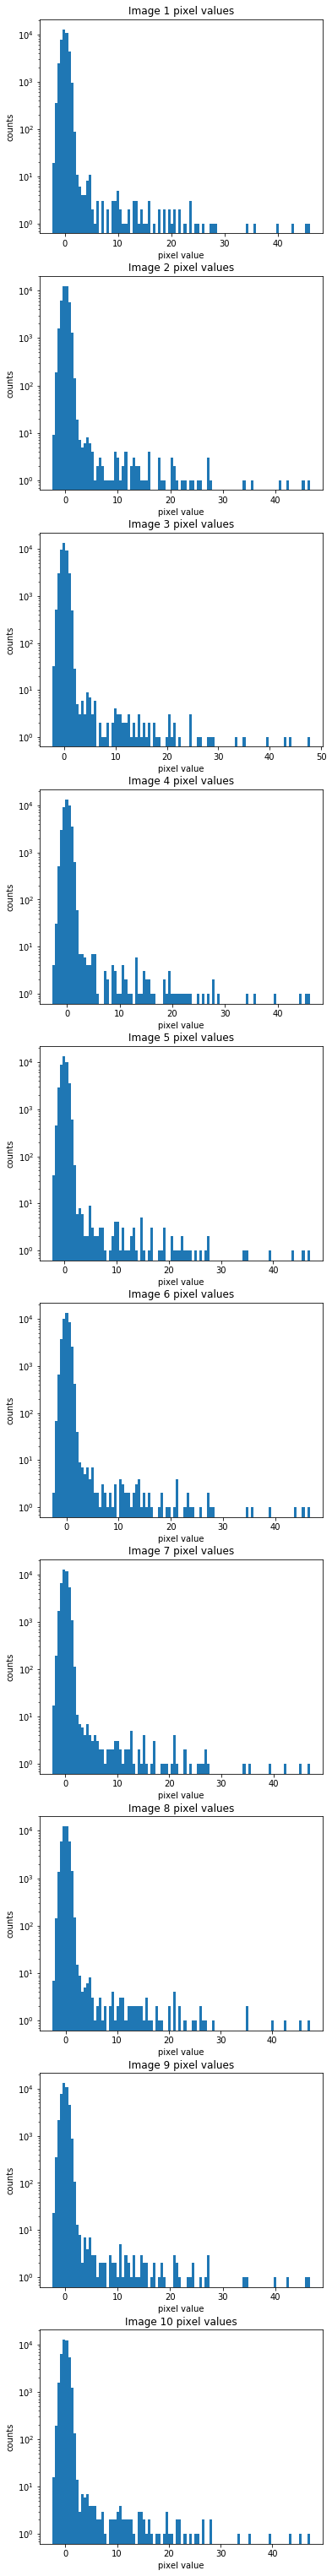

In [3]:
f, a = plt.subplots(10, 1, figsize=(6, 55))

for i in range(10):
    lid = np.array([])
    for j in range(200):
        lid = np.concatenate((lid, pics[:,j,i]))
    a[i].hist(lid, bins=100)
    a[i].set_yscale('log')
    a[i].set_title('Image {} pixel values'.format(str(i +1)))
    a[i].set_xlabel('pixel value')
    a[i].set_ylabel('counts')

plt.show()

Each image appears to be a combination of two parts: one which is a normal distribution centered at 0 which looks very similar across all images, and the other being a long, slow-dying tail of increasingly bright events. Now, look at the differences between consecutive images.

(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)
(40000,)


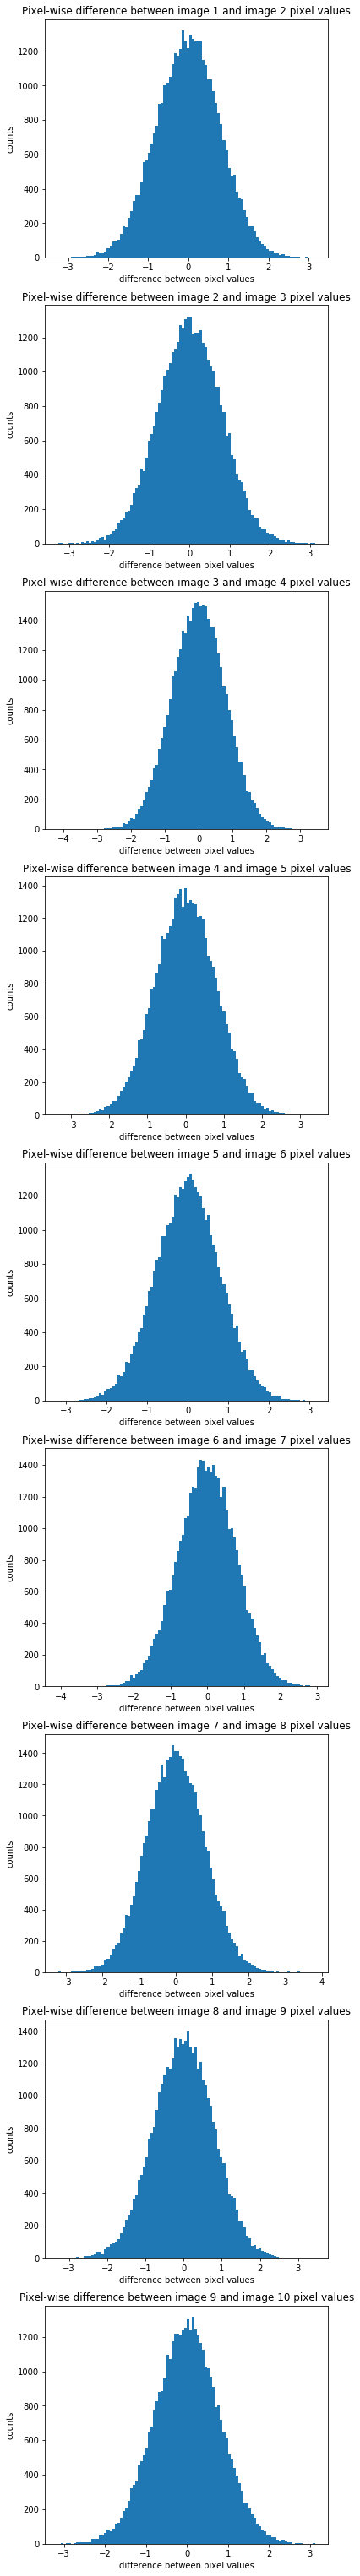

In [10]:
f, a = plt.subplots(9, 1, figsize=(6, 55))

bowie = []

for i in range(9):
    bowie.append(np.array([]))
    for j in range(200):
        bowie[i] = np.concatenate((bowie[i], pics[:,j, i+1] - pics[:,j,i]))
    print(bowie[i].shape)
    a[i].hist(bowie[i], bins=100)
#     a[i].set_yscale('log')
    a[i].set_title('Pixel-wise difference between image {} and image {} pixel values'.format(str(i +1), str(i + 2)))
    a[i].set_xlabel('difference between pixel values')
    a[i].set_ylabel('counts')

plt.show()

So, while the individual images may have unusual distributions, the differences appear to be more or less normally distributed; their log has a nice inverse parabolic curve. This is now enough to find a background. First, as a null hypothesis, assume there are no transient events, that is, everything which appears in one image appears in all of them. We may then take the array of differences across all of our images, sum each element-wise (that is, pixel-wise), and divide by the number of such elements in the sum to get the average variation of each given pixel. The histogram over such values will give the distribution of the pixel-wise difference from one image to the next. This, once normalized, will be our pixel-variation background, or just background. Transients are defined by the fact that they appear in only one image, which translates to their pixels having a very large change in value between images. By construction, our background will allow us to deduce a probability for just such a difference. First construct the background:

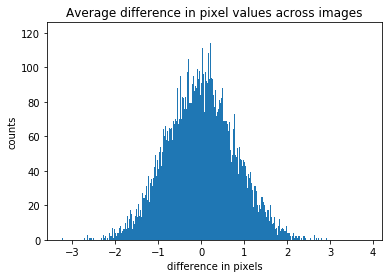

In [69]:
background = bowie[0]
for i in range(8):
    background = np.add(background, bowie[i + 1])

ar = plt.hist(background, bins = 1500)
plt.title('Average difference in pixel values across images')
plt.xlabel('difference in pixels')
plt.ylabel('counts')
plt.show()

# 2C

We now have a background for the data, up to normalization (this is done in the cell below); up to vertical rescaling, we have the shape of our data. To search for a signal, we note that transients will have abnormally large pixel variation. Thus, more signal-like events correspond to larger magnitude signals, be they above or below zero. We then define as usual the probability of an event to be the probability that the background produce an event as or more signal like than the given event, which is to say, the background produces an event with a larger change in the pixel corresponding to our event across successive pictures. We can find this probability by integrating; if the magnitude of our event is $m$, then we integrate from $m$ to infinity and from minus infinity to $-m$. The complement of this value (that is, the probability-complement, or, 1 minus this pair of integrations) must be at least equal to the 5 sigma cutoff value, but this is equivalent to saying that the integral from $-m$ to $m$ is the integral from 0 to the 5 sigma mark on the standard normal distribution, which is a known quantity. We then integrate symmetrically outwards until the area integrated reaches the desired probability.

In [58]:
sig = stats.norm.cdf(5)
z = np.argmin(np.absolute(ar[1])) #find the bin closest to zero

probs = ar[0] / sum(ar[0]) #normalize so we have a proper probability distribution
p = probs[z] 
see, cee = 1, -1
while p < sig: #integrate until we have gotten to 5 sigma of probability
    see = min([see + 1, len(probs) - z - 1]) #simultaneously sum the bins upwards from the near-zero bin...
    cee = max([cee - 1, z]) #...and downwards from the near-zero bin
    p += probs[z + see] + probs[z - cee]
lf = ar[1][z - cee]
rt = ar[1][z + see]
print('Our left and right 5 sigma threshholds are at {} and {}, respectively'.format(lf, rt))

Our left and right 5 sigma threshholds are at -3.2213898116493596 and 3.848896424647788, respectively


We thus get our cutoffs. The asymmetry is worth noting; it is due to our distribution being slightly biased towards positive values. It is less likely to have a pixel rapidly darken than to brighten, apparently. To make it symmetric, we may just change the smaller magnitude bound to be the negative of the other bound, which will slightly overshoot the 5 sigma mark. However, I will keep these threshholds for the time being, as they capture some interesting information about our physics: it is rarer to see te sky go dark than to see it lighten up. 

In [57]:
pts = 0
for i in range(9):
    h = len(np.where((bowie[i] < lf) | (bowie[i] > rt))[0])
    pts += h
    
print('We find {} events beyond the 5 sigma threshhold.'.format(str(pts)))

We find 14 events beyond the 5 sigma threshhold.


# 2D

Me and my partner have different pdfs because we are looking at different features of the data. I was looking for transients, which means the observable I was concerned about was the change in pixel intensity between successive pictures, so naturally I would generate the distribution of this pixel-difference observable. However, my partner is concerned with faint, stationary stars, which we expect to have little to no pixel difference between successive images, such that my background would be useless for him - instead, he will generate a pdf from the data based about a variable of concern for such stars. In general, there are multiple observables that can be extracted from a data set, and our pdfs differ, despite having the same data, because we are looking for qualitatively different signals from the data.